# Import Library

In [130]:
import pandas as pd
import numpy as np

# Import Dataset

In [131]:
df_covid = pd.read_csv('/content/drive/MyDrive/Project Goes to Bali/Indonesia_coronavirus_daily_data.csv')

In [132]:
df_covid

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7
...,...,...,...,...,...,...,...,...,...,...
17608,2021-08-14,NUSA TENGGARA TIMUR,649,21,892,-264,52686,42250,1016,9420
17609,2021-08-15,NUSA TENGGARA TIMUR,498,7,1421,-930,53184,43671,1023,8490
17610,2021-08-16,NUSA TENGGARA TIMUR,438,18,969,-549,53622,44640,1041,7941
17611,2021-08-17,NUSA TENGGARA TIMUR,657,15,633,9,54279,45273,1056,7950


# Cleaning Data

## Data duplicate

In [133]:
# Covid data duplicate
df_covid[df_covid.duplicated()]

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case


## Missing value

In [134]:
df_covid.isnull().sum()

Date                      0
Province                  0
Daily_Case                0
Daily_Death               0
Daily_Recovered           0
Active_Case               0
Cumulative_Case           0
Cumulative_Recovered      0
Cumulative_Death          0
Cumulative_Active_Case    0
dtype: int64

## Outlier

In [135]:
from scipy import stats
# Data covid outlier

print(f'Rows before filter outlier: {len(df_covid)}')
filtered_entries = np.array([True] * len(df_covid))
for col in ['Daily_Case', 'Daily_Death', 'Daily_Recovered', 'Active_Case',
       'Cumulative_Case', 'Cumulative_Recovered', 'Cumulative_Death',
       'Cumulative_Active_Case']:
    zscore = abs(stats.zscore(df_covid[col]))
    filtered_entries = (zscore < 3) & filtered_entries
print(f'Outlier: {len(df_covid)-len(df_covid[filtered_entries])}')
df_covid = df_covid[filtered_entries]

print(f'Rows after filter outlier: {len(df_covid)}')

Rows before filter outlier: 17613
Outlier: 938
Rows after filter outlier: 16675


# EDA

## Covid

### Dataset

In [136]:
#info
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16675 entries, 0 to 17612
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    16675 non-null  object
 1   Province                16675 non-null  object
 2   Daily_Case              16675 non-null  int64 
 3   Daily_Death             16675 non-null  int64 
 4   Daily_Recovered         16675 non-null  int64 
 5   Active_Case             16675 non-null  int64 
 6   Cumulative_Case         16675 non-null  int64 
 7   Cumulative_Recovered    16675 non-null  int64 
 8   Cumulative_Death        16675 non-null  int64 
 9   Cumulative_Active_Case  16675 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.4+ MB


In [137]:
print(f"Total features: {df_covid.shape[1]}")

Total features: 10


In [138]:
# Unique Value
df_covid.nunique()

Date                        591
Province                     34
Daily_Case                 1102
Daily_Death                  88
Daily_Recovered             978
Active_Case                1029
Cumulative_Case           10625
Cumulative_Recovered       9685
Cumulative_Death           2135
Cumulative_Active_Case     5173
dtype: int64

### Date

In [139]:
df_covid['Date'].head(5)

0    2020-03-01
1    2020-03-02
2    2020-03-03
3    2020-03-04
4    2020-03-05
Name: Date, dtype: object

In [140]:
# unique value
df_covid['Date'].value_counts()

2020-12-22    34
2020-09-23    34
2020-09-21    34
2020-09-20    34
2020-09-19    34
              ..
2020-02-06     1
2020-02-05     1
2020-02-04     1
2020-02-03     1
2020-01-31     1
Name: Date, Length: 591, dtype: int64

In [141]:
print(f"Tanggal pertama kali kasus covid: {df_covid.Date.min()}")

Tanggal pertama kali kasus covid: 2020-01-08


In [142]:
print(f"Lama waktu catatan kasus covid: {len(df_covid['Date'].value_counts())} hari")

Lama waktu catatan kasus covid: 591 hari


In [143]:
print(f"Jangka waktu catatan kasus covid: {df_covid.Date.min()} sampai {df_covid.Date.max()}")

Jangka waktu catatan kasus covid: 2020-01-08 sampai 2021-08-20


In [144]:
df_covid[df_covid['Date'].str.contains('2020')].head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7


In [145]:
df_covid[df_covid['Date'].str.contains('2021')].head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
306,2021-01-01,DKI JAKARTA,1956,20,1643,293,185654,166314,3270,16070
307,2021-01-02,DKI JAKARTA,1894,26,2280,-412,187548,168594,3296,15658
308,2021-01-03,DKI JAKARTA,1658,10,1691,-43,189206,170285,3306,15615
310,2021-01-05,DKI JAKARTA,1824,19,1339,466,192862,174151,3346,15365
841,2021-01-01,JAWA BARAT,1504,3,1204,297,85083,71767,1173,12143


In [146]:
print(f"Total catatan kasus covid pada tahun 2020: {df_covid[df_covid['Date'].str.contains('2020')].shape[0]} kasus")

Total catatan kasus covid pada tahun 2020: 9776 kasus


In [147]:
print(f"Total catatan kasus covid pada tahun 2021: {df_covid[df_covid['Date'].str.contains('2021')].shape[0]} kasus")

Total catatan kasus covid pada tahun 2021: 6899 kasus


### Province

In [148]:
# unique value
df_covid['Province'].value_counts()

RIAU                          534
SULAWESI TENGGARA             527
BALI                          525
SUMATERA UTARA                522
SULAWESI SELATAN              520
KALIMANTAN TIMUR              518
KEPULAUAN RIAU                518
JAMBI                         517
MALUKU                        517
MALUKU UTARA                  515
SUMATERA SELATAN              514
PAPUA                         513
SUMATERA BARAT                511
ACEH                          511
SULAWESI UTARA                511
SULAWESI TENGAH               511
PAPUA BARAT                   510
KALIMANTAN UTARA              509
SULAWESI BARAT                509
KALIMANTAN TENGAH             508
KALIMANTAN BARAT              508
KALIMANTAN SELATAN            507
KEPULAUAN BANGKA BELITUNG     507
NUSA TENGGARA BARAT           506
BENGKULU                      506
LAMPUNG                       505
BANTEN                        504
GORONTALO                     496
NUSA TENGGARA TIMUR           495
DAERAH ISTIMEW

In [149]:
print(f"Total banyaknya provinsi : {len(df_covid['Province'].value_counts())}")

Total banyaknya provinsi : 34


In [150]:
print(f"Provinsi dengan catatan terbanyak: {df_covid['Province'].value_counts().head(1)}")
print(f"Provinsi dengan catatan terkecil: {df_covid['Province'].value_counts().tail(1)}")

Provinsi dengan catatan terbanyak: RIAU    534
Name: Province, dtype: int64
Provinsi dengan catatan terkecil: DKI JAKARTA    308
Name: Province, dtype: int64


### Daily Case

In [151]:
df_covid['Date'] = pd.to_datetime(df_covid['Date'], format='%Y-%m-%d')

<ipython-input-151-43f7b536314c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid['Date'] = pd.to_datetime(df_covid['Date'], format='%Y-%m-%d')


In [152]:
# unique value
df_covid['Daily_Case'].value_counts()

0       2053
1        606
2        465
3        374
4        306
        ... 
1007       1
545        1
809        1
544        1
867        1
Name: Daily_Case, Length: 1102, dtype: int64

In [153]:
# Rata-rata daily case
print(f"Rata-rata jumlah daily case : {df_covid['Daily_Case'].mean().round()} kasus")


Rata-rata jumlah daily case : 118.0 kasus


In [154]:
# Daily case terbanyak
print(f"Catatan daily case terbanyak : {df_covid['Daily_Case'].max()} kasus")

Catatan daily case terbanyak : 2364 kasus


In [155]:
print(f"Jumlah data catatan dengan daily case terbanyak : {len(df_covid[df_covid['Daily_Case'] == df_covid['Daily_Case'].max()]['Province'])} data")

Jumlah data catatan dengan daily case terbanyak : 1 data


In [156]:
# Daily case paling sedikit
print(f"Catatan daily case paling sedikit : {df_covid['Daily_Case'].min()} kasus")

Catatan daily case paling sedikit : 0 kasus


In [157]:
print(f"Jumlah data catatan dengan daily case paling sedikit : {len(df_covid[df_covid['Daily_Case'] == df_covid['Daily_Case'].min()]['Province'])} data")

Jumlah data catatan dengan daily case paling sedikit : 2053 data


#### Daily case / date

In [158]:
print(f"Date dengan catatan daily case terbanyak : ")
print(df_covid[df_covid['Daily_Case'] == df_covid['Daily_Case'].max()]['Date'])

Date dengan catatan daily case terbanyak : 
7335   2021-07-30
Name: Date, dtype: datetime64[ns]


In [159]:
# Total jumlah daily case pada setiap date
df_covid.groupby('Date').sum()['Daily_Case']

Date
2020-01-08        9
2020-01-09        0
2020-01-10        0
2020-01-11        0
2020-01-12        0
              ...  
2021-08-16     9414
2021-08-17    11724
2021-08-18     8157
2021-08-19        1
2021-08-20        6
Name: Daily_Case, Length: 591, dtype: int64

In [160]:
# Rata-rata jumlah daily case setiap Date
df_covid.groupby('Date').mean()['Daily_Case'].round()

Date
2020-01-08      9.0
2020-01-09      0.0
2020-01-10      0.0
2020-01-11      0.0
2020-01-12      0.0
              ...  
2021-08-16    314.0
2021-08-17    404.0
2021-08-18    281.0
2021-08-19      0.0
2021-08-20      2.0
Name: Daily_Case, Length: 591, dtype: float64

In [161]:
# Jumlah maksimal daily case setiap Date
df_covid.groupby('Date').max()['Daily_Case']

Date
2020-01-08       9
2020-01-09       0
2020-01-10       0
2020-01-11       0
2020-01-12       0
              ... 
2021-08-16     888
2021-08-17    1172
2021-08-18     869
2021-08-19       1
2021-08-20       2
Name: Daily_Case, Length: 591, dtype: int64

In [162]:
# Jumlah minimal daily case setiap Date
df_covid.groupby('Date').min()['Daily_Case']

Date
2020-01-08     9
2020-01-09     0
2020-01-10     0
2020-01-11     0
2020-01-12     0
              ..
2021-08-16    26
2021-08-17    23
2021-08-18    18
2021-08-19     0
2021-08-20     1
Name: Daily_Case, Length: 591, dtype: int64

#### Daily case / province

In [163]:
print(f"Provinsi dengan catatan daily case terbanyak : ")
print(df_covid[df_covid['Daily_Case'] == df_covid['Daily_Case'].max()]['Province'])

Provinsi dengan catatan daily case terbanyak : 
7335    KALIMANTAN TIMUR
Name: Province, dtype: object


In [164]:
# Total jumlah daily case setiap provinsi
df_covid.groupby('Province').sum()['Daily_Case'].sort_values()

Province
GORONTALO                      10462
SULAWESI BARAT                 10746
MALUKU UTARA                   11284
MALUKU                         14166
SULAWESI TENGGARA              18846
BENGKULU                       21574
PAPUA BARAT                    21671
NUSA TENGGARA BARAT            23854
JAMBI                          25727
ACEH                           28547
PAPUA                          28810
KALIMANTAN UTARA               28876
SULAWESI UTARA                 30226
KALIMANTAN BARAT               32512
SULAWESI TENGAH                36917
KALIMANTAN TENGAH              40163
LAMPUNG                        40174
KEPULAUAN BANGKA BELITUNG      42795
NUSA TENGGARA TIMUR            50181
KEPULAUAN RIAU                 50712
SUMATERA SELATAN               55545
KALIMANTAN SELATAN             60376
BANTEN                         65512
SUMATERA BARAT                 82738
SUMATERA UTARA                 84273
JAWA TIMUR                     92215
DAERAH ISTIMEWA YOGYAKARTA   

In [165]:
# Rata-rata jumlah daily case setiap provinsi
df_covid.groupby('Province').mean()['Daily_Case'].sort_values().round()

Province
GORONTALO                      21.0
SULAWESI BARAT                 21.0
MALUKU UTARA                   22.0
MALUKU                         27.0
SULAWESI TENGGARA              36.0
PAPUA BARAT                    42.0
BENGKULU                       43.0
NUSA TENGGARA BARAT            47.0
JAMBI                          50.0
ACEH                           56.0
PAPUA                          56.0
KALIMANTAN UTARA               57.0
SULAWESI UTARA                 59.0
KALIMANTAN BARAT               64.0
SULAWESI TENGAH                72.0
KALIMANTAN TENGAH              79.0
LAMPUNG                        80.0
KEPULAUAN BANGKA BELITUNG      84.0
KEPULAUAN RIAU                 98.0
NUSA TENGGARA TIMUR           101.0
SUMATERA SELATAN              108.0
KALIMANTAN SELATAN            119.0
BANTEN                        130.0
SUMATERA UTARA                161.0
SUMATERA BARAT                162.0
BALI                          188.0
DAERAH ISTIMEWA YOGYAKARTA    189.0
SULAWESI SELATAN   

In [166]:
# Jumlah maksimal daily case setiap provinsi
df_covid.groupby('Province').max()['Daily_Case'].sort_values()

Province
SULAWESI BARAT                 241
GORONTALO                      278
SULAWESI TENGGARA              311
MALUKU                         349
PAPUA                          360
MALUKU UTARA                   360
ACEH                           411
KALIMANTAN TENGAH              482
NUSA TENGGARA BARAT            503
BENGKULU                       520
JAMBI                          567
PAPUA BARAT                    605
KALIMANTAN UTARA               632
SULAWESI UTARA                 708
LAMPUNG                        717
KALIMANTAN BARAT               779
KEPULAUAN BANGKA BELITUNG      862
KEPULAUAN RIAU                 928
KALIMANTAN SELATAN             958
JAWA TIMUR                    1015
SUMATERA BARAT                1157
NUSA TENGGARA TIMUR           1249
SUMATERA SELATAN              1278
SULAWESI SELATAN              1359
BANTEN                        1368
SULAWESI TENGAH               1566
BALI                          1910
JAWA TENGAH                   1995
SUMATERA UT

### Daily Death

In [167]:
# unique value
df_covid['Daily_Death'].value_counts()

0     8010
1     2416
2     1503
3      967
4      679
      ... 
77       1
80       1
79       1
67       1
60       1
Name: Daily_Death, Length: 88, dtype: int64

In [168]:
# Rata-rata daily death
print(f"Rata-rata jumlah daily death : {df_covid['Daily_Death'].mean().round()} kasus")

Rata-rata jumlah daily death : 3.0 kasus


In [169]:
# Daily death terbanyak
print(f"Catatan daily death terbanyak : {df_covid['Daily_Death'].max()} kasus")

Catatan daily death terbanyak : 88 kasus


In [170]:
print(f"Jumlah data catatan dengan daily death terbanyak : {len(df_covid[df_covid['Daily_Death'] == df_covid['Daily_Death'].max()]['Province'])} data")

Jumlah data catatan dengan daily death terbanyak : 2 data


In [171]:
# Daily death paling sedikit
print(f"Catatan daily death paling sedikit : {df_covid['Daily_Death'].min()} kasus")

Catatan daily death paling sedikit : 0 kasus


In [172]:
print(f"Jumlah data catatan dengan daily death paling sedikit : {len(df_covid[df_covid['Daily_Death'] == df_covid['Daily_Death'].min()]['Province'])} data")

Jumlah data catatan dengan daily death paling sedikit : 8010 data


#### Daily death / date

In [173]:
print(f"Date dengan catatan daily death terbanyak : ")
print(df_covid[df_covid['Daily_Death'] == df_covid['Daily_Death'].max()]['Date'])

Date dengan catatan daily death terbanyak : 
1972    2021-01-14
10956   2021-08-04
Name: Date, dtype: datetime64[ns]


In [174]:
# Total jumlah daily death pada setiap date
df_covid.groupby('Date').sum()['Daily_Death']

Date
2020-01-08      3
2020-01-09      1
2020-01-10      1
2020-01-11      3
2020-01-12      3
             ... 
2021-08-16    547
2021-08-17    462
2021-08-18    512
2021-08-19     30
2021-08-20      1
Name: Daily_Death, Length: 591, dtype: int64

In [175]:
# Rata-rata jumlah daily death setiap Date
df_covid.groupby('Date').mean()['Daily_Death'].round()

Date
2020-01-08     3.0
2020-01-09     1.0
2020-01-10     1.0
2020-01-11     3.0
2020-01-12     3.0
              ... 
2021-08-16    18.0
2021-08-17    16.0
2021-08-18    18.0
2021-08-19     6.0
2021-08-20     0.0
Name: Daily_Death, Length: 591, dtype: float64

In [176]:
# Jumlah maksimal daily death setiap Date
df_covid.groupby('Date').max()['Daily_Death']

Date
2020-01-08     3
2020-01-09     1
2020-01-10     1
2020-01-11     3
2020-01-12     3
              ..
2021-08-16    71
2021-08-17    52
2021-08-18    72
2021-08-19    11
2021-08-20     1
Name: Daily_Death, Length: 591, dtype: int64

In [177]:
# Jumlah minimal daily death case setiap Date
df_covid.groupby('Date').min()['Daily_Death']

Date
2020-01-08    3
2020-01-09    1
2020-01-10    1
2020-01-11    3
2020-01-12    3
             ..
2021-08-16    0
2021-08-17    0
2021-08-18    0
2021-08-19    2
2021-08-20    0
Name: Daily_Death, Length: 591, dtype: int64

#### Daily death / province

In [178]:
print(f"Provinsi dengan catatan daily death terbanyak : ")
print(df_covid[df_covid['Daily_Death'] == df_covid['Daily_Death'].max()]['Province'])

Provinsi dengan catatan daily death terbanyak : 
1972     JAWA TENGAH
10956        LAMPUNG
Name: Province, dtype: object


In [179]:
# Total jumlah daily death setiap provinsi
df_covid.groupby('Province').sum()['Daily_Death'].sort_values()

Province
SULAWESI BARAT                 239
MALUKU                         242
MALUKU UTARA                   274
PAPUA BARAT                    325
PAPUA                          345
BENGKULU                       350
GORONTALO                      352
SULAWESI TENGGARA              451
JAMBI                          591
KALIMANTAN UTARA               595
NUSA TENGGARA BARAT            650
KALIMANTAN BARAT               707
SULAWESI UTARA                 872
KALIMANTAN TENGAH              969
NUSA TENGGARA TIMUR            989
KEPULAUAN BANGKA BELITUNG     1043
SULAWESI TENGAH               1130
ACEH                          1212
KEPULAUAN RIAU                1506
BANTEN                        1564
JAWA BARAT                    1705
SULAWESI SELATAN              1789
SUMATERA BARAT                1841
KALIMANTAN SELATAN            1878
SUMATERA UTARA                2010
LAMPUNG                       2235
DAERAH ISTIMEWA YOGYAKARTA    2573
BALI                          2602
SUMATERA SE

In [180]:
# Rata-rata jumlah daily death setiap provinsi
df_covid.groupby('Province').mean()['Daily_Death'].sort_values().round()

Province
MALUKU                         0.0
SULAWESI BARAT                 0.0
MALUKU UTARA                   1.0
PAPUA BARAT                    1.0
PAPUA                          1.0
BENGKULU                       1.0
GORONTALO                      1.0
SULAWESI TENGGARA              1.0
JAMBI                          1.0
KALIMANTAN UTARA               1.0
NUSA TENGGARA BARAT            1.0
KALIMANTAN BARAT               1.0
SULAWESI UTARA                 2.0
KALIMANTAN TENGAH              2.0
NUSA TENGGARA TIMUR            2.0
KEPULAUAN BANGKA BELITUNG      2.0
SULAWESI TENGAH                2.0
ACEH                           2.0
KEPULAUAN RIAU                 3.0
BANTEN                         3.0
SULAWESI SELATAN               3.0
SUMATERA BARAT                 4.0
KALIMANTAN SELATAN             4.0
SUMATERA UTARA                 4.0
LAMPUNG                        4.0
BALI                           5.0
JAWA BARAT                     5.0
SUMATERA SELATAN               5.0
DAERAH ISTI

In [181]:
# Jumlah maksimal daily death setiap provinsi
df_covid.groupby('Province').max()['Daily_Death'].sort_values()

Province
SULAWESI BARAT                 8
MALUKU UTARA                  11
MALUKU                        11
SULAWESI TENGGARA             12
PAPUA BARAT                   13
GORONTALO                     16
BENGKULU                      17
NUSA TENGGARA BARAT           23
PAPUA                         25
JAMBI                         26
KALIMANTAN UTARA              26
SULAWESI UTARA                28
ACEH                          30
KEPULAUAN BANGKA BELITUNG     30
SUMATERA BARAT                33
SULAWESI SELATAN              35
DKI JAKARTA                   36
SULAWESI TENGAH               37
NUSA TENGGARA TIMUR           43
SUMATERA UTARA                49
KALIMANTAN SELATAN            49
KALIMANTAN BARAT              50
RIAU                          56
KEPULAUAN RIAU                62
SUMATERA SELATAN              64
BALI                          66
KALIMANTAN TENGAH             70
JAWA BARAT                    73
JAWA TIMUR                    81
BANTEN                        85
D

### Daily Recovered

In [182]:
# unique value
df_covid['Daily_Recovered'].value_counts()

0       3099
1        735
2        445
3        425
4        360
        ... 
1122       1
1407       1
774        1
407        1
949        1
Name: Daily_Recovered, Length: 978, dtype: int64

In [183]:
# Rata-rata daily recovered
print(f"Rata-rata jumlah daily recovered : {df_covid['Daily_Recovered'].mean().round()} kasus")

Rata-rata jumlah daily recovered : 96.0 kasus


In [184]:
# Daily recovered terbanyak
print(f"Catatan daily recovered terbanyak : {df_covid['Daily_Recovered'].max()} kasus")

Catatan daily recovered terbanyak : 2305 kasus


In [185]:
print(f"Jumlah data catatan dengan daily recovered terbanyak : {len(df_covid[df_covid['Daily_Recovered'] == df_covid['Daily_Recovered'].max()]['Province'])} data")

Jumlah data catatan dengan daily recovered terbanyak : 1 data


In [186]:
# Daily recovered paling sedikit
print(f"Catatan daily death paling sedikit : {df_covid['Daily_Recovered'].min()} kasus")

Catatan daily death paling sedikit : 0 kasus


In [187]:
print(f"Jumlah data catatan dengan daily recovered paling sedikit : {len(df_covid[df_covid['Daily_Recovered'] == df_covid['Daily_Recovered'].min()]['Province'])} data")

Jumlah data catatan dengan daily recovered paling sedikit : 3099 data


#### Daily recovered / date

In [188]:
print(f"Date dengan catatan daily recovered terbanyak : ")
print(df_covid[df_covid['Daily_Recovered'] == df_covid['Daily_Recovered'].max()]['Date'])

Date dengan catatan daily recovered terbanyak : 
7345   2021-08-09
Name: Date, dtype: datetime64[ns]


In [189]:
# Total jumlah daily recovered pada setiap date
df_covid.groupby('Date').sum()['Daily_Recovered']

Date
2020-01-08        1
2020-01-09       23
2020-01-10       14
2020-01-11        8
2020-01-12        1
              ...  
2021-08-16    16912
2021-08-17    15426
2021-08-18    14377
2021-08-19      367
2021-08-20        0
Name: Daily_Recovered, Length: 591, dtype: int64

In [190]:
# Rata-rata jumlah daily recovered setiap Date
df_covid.groupby('Date').mean()['Daily_Recovered'].round()

Date
2020-01-08      1.0
2020-01-09     23.0
2020-01-10     14.0
2020-01-11      8.0
2020-01-12      1.0
              ...  
2021-08-16    564.0
2021-08-17    532.0
2021-08-18    496.0
2021-08-19     73.0
2021-08-20      0.0
Name: Daily_Recovered, Length: 591, dtype: float64

In [191]:
# Jumlah maksimal daily recovered setiap Date
df_covid.groupby('Date').max()['Daily_Recovered']

Date
2020-01-08       1
2020-01-09      23
2020-01-10      14
2020-01-11       8
2020-01-12       1
              ... 
2021-08-16    1892
2021-08-17    1573
2021-08-18    1656
2021-08-19     171
2021-08-20       0
Name: Daily_Recovered, Length: 591, dtype: int64

In [192]:
# Jumlah minimal daily recovered case setiap Date
df_covid.groupby('Date').min()['Daily_Recovered']

Date
2020-01-08     1
2020-01-09    23
2020-01-10    14
2020-01-11     8
2020-01-12     1
              ..
2021-08-16    53
2021-08-17    39
2021-08-18    36
2021-08-19     0
2021-08-20     0
Name: Daily_Recovered, Length: 591, dtype: int64

#### Daily recovered / province

In [193]:
print(f"Provinsi dengan catatan daily recovered terbanyak : ")
print(df_covid[df_covid['Daily_Recovered'] == df_covid['Daily_Recovered'].max()]['Province'])

Provinsi dengan catatan daily recovered terbanyak : 
7345    KALIMANTAN TIMUR
Name: Province, dtype: object


In [194]:
# Total jumlah daily recovered setiap provinsi
df_covid.groupby('Province').sum()['Daily_Recovered'].sort_values()

Province
GORONTALO                       8491
SULAWESI BARAT                  8737
MALUKU UTARA                    9722
MALUKU                         11675
PAPUA                          15017
SULAWESI TENGGARA              15810
BENGKULU                       17787
PAPUA BARAT                    19577
JAMBI                          20903
KALIMANTAN UTARA               21432
ACEH                           21521
NUSA TENGGARA BARAT            21668
SULAWESI UTARA                 23738
SULAWESI TENGAH                25981
KALIMANTAN BARAT               28515
LAMPUNG                        30266
KALIMANTAN TENGAH              31646
KEPULAUAN BANGKA BELITUNG      36353
NUSA TENGGARA TIMUR            42312
SUMATERA SELATAN               45769
KEPULAUAN RIAU                 46838
KALIMANTAN SELATAN             47327
SUMATERA UTARA                 54797
BANTEN                         56743
JAWA TENGAH                    62772
DAERAH ISTIMEWA YOGYAKARTA     66969
SUMATERA BARAT               

In [195]:
# Rata-rata jumlah daily recovered setiap provinsi
df_covid.groupby('Province').mean()['Daily_Recovered'].sort_values().round()

Province
GORONTALO                      17.0
SULAWESI BARAT                 17.0
MALUKU UTARA                   19.0
MALUKU                         23.0
PAPUA                          29.0
SULAWESI TENGGARA              30.0
BENGKULU                       35.0
PAPUA BARAT                    38.0
JAMBI                          40.0
KALIMANTAN UTARA               42.0
ACEH                           42.0
NUSA TENGGARA BARAT            43.0
SULAWESI UTARA                 46.0
SULAWESI TENGAH                51.0
KALIMANTAN BARAT               56.0
LAMPUNG                        60.0
KALIMANTAN TENGAH              62.0
KEPULAUAN BANGKA BELITUNG      72.0
NUSA TENGGARA TIMUR            85.0
SUMATERA SELATAN               89.0
KEPULAUAN RIAU                 90.0
KALIMANTAN SELATAN             93.0
SUMATERA UTARA                105.0
BANTEN                        113.0
DAERAH ISTIMEWA YOGYAKARTA    136.0
SUMATERA BARAT                139.0
BALI                          146.0
SULAWESI SELATAN   

In [196]:
# Jumlah maksimal daily recovered setiap provinsi
df_covid.groupby('Province').max()['Daily_Recovered'].sort_values()

Province
GORONTALO                      232
MALUKU                         262
SULAWESI BARAT                 328
SULAWESI TENGGARA              340
PAPUA                          428
MALUKU UTARA                   458
SULAWESI UTARA                 465
BENGKULU                       480
KALIMANTAN BARAT               606
NUSA TENGGARA BARAT            618
KEPULAUAN BANGKA BELITUNG      682
KALIMANTAN TENGAH              685
PAPUA BARAT                    733
JAMBI                          788
JAWA TIMUR                     906
LAMPUNG                        910
KALIMANTAN UTARA               923
SULAWESI TENGAH                952
SUMATERA SELATAN               960
ACEH                          1033
KALIMANTAN SELATAN            1129
SUMATERA BARAT                1300
JAWA TENGAH                   1327
KEPULAUAN RIAU                1379
DAERAH ISTIMEWA YOGYAKARTA    1460
SUMATERA UTARA                1502
BANTEN                        1510
NUSA TENGGARA TIMUR           1514
SULAWESI SE

### Active Case

In [197]:
# unique value
df_covid['Active_Case'].value_counts()

 0       1693
 1        535
-1        478
 2        406
 3        322
         ... 
 1036       1
 576        1
-301        1
 782        1
-549        1
Name: Active_Case, Length: 1029, dtype: int64

In [198]:
# Rata-rata active case
print(f"Rata-rata jumlah active case : {df_covid['Active_Case'].mean().round()} kasus")

Rata-rata jumlah active case : 18.0 kasus


In [199]:
# Active case terbanyak
print(f"Catatan Active case terbanyak : {df_covid['Active_Case'].max()} kasus")

Catatan Active case terbanyak : 1292 kasus


In [200]:
print(f"Jumlah data catatan dengan active case terbanyak : {len(df_covid[df_covid['Active_Case'] == df_covid['Active_Case'].max()]['Province'])} data")

Jumlah data catatan dengan active case terbanyak : 1 data


#### Active case / date

In [201]:
print(f"Date dengan catatan active case terbanyak : ")
print(df_covid[df_covid['Active_Case'] == df_covid['Active_Case'].max()]['Date'])

Date dengan catatan active case terbanyak : 
8366   2021-07-18
Name: Date, dtype: datetime64[ns]


In [202]:
# Total jumlah active case pada setiap date
df_covid.groupby('Date').sum()['Active_Case']

Date
2020-01-08       5
2020-01-09     -24
2020-01-10     -15
2020-01-11     -11
2020-01-12      -4
              ... 
2021-08-16   -8045
2021-08-17   -4164
2021-08-18   -6732
2021-08-19    -396
2021-08-20       5
Name: Active_Case, Length: 591, dtype: int64

In [203]:
# Rata-rata jumlah active case setiap Date
df_covid.groupby('Date').mean()['Active_Case'].round()

Date
2020-01-08      5.0
2020-01-09    -24.0
2020-01-10    -15.0
2020-01-11    -11.0
2020-01-12     -4.0
              ...  
2021-08-16   -268.0
2021-08-17   -144.0
2021-08-18   -232.0
2021-08-19    -79.0
2021-08-20      1.0
Name: Active_Case, Length: 591, dtype: float64

In [204]:
# Jumlah maksimal active case setiap Date
df_covid.groupby('Date').max()['Active_Case']

Date
2020-01-08      5
2020-01-09    -24
2020-01-10    -15
2020-01-11    -11
2020-01-12     -4
             ... 
2021-08-16    178
2021-08-17    416
2021-08-18    197
2021-08-19     -1
2021-08-20      2
Name: Active_Case, Length: 591, dtype: int64

In [205]:
# Jumlah minimal daily active case setiap Date
df_covid.groupby('Date').min()['Active_Case']

Date
2020-01-08       5
2020-01-09     -24
2020-01-10     -15
2020-01-11     -11
2020-01-12      -4
              ... 
2021-08-16   -1330
2021-08-17    -932
2021-08-18   -1090
2021-08-19    -182
2021-08-20       0
Name: Active_Case, Length: 591, dtype: int64

#### Active case / province

In [206]:
print(f"Provinsi dengan catatan active case terbanyak : ")
print(df_covid[df_covid['Active_Case'] == df_covid['Active_Case'].max()]['Province'])

Provinsi dengan catatan active case terbanyak : 
8366    DAERAH ISTIMEWA YOGYAKARTA
Name: Province, dtype: object


In [207]:
# Total jumlah active case setiap provinsi
df_covid.groupby('Province').sum()['Active_Case'].sort_values()

Province
MALUKU UTARA                   1288
NUSA TENGGARA BARAT            1536
GORONTALO                      1619
PAPUA BARAT                    1769
SULAWESI BARAT                 1770
MALUKU                         2249
KEPULAUAN RIAU                 2368
SULAWESI TENGGARA              2585
KALIMANTAN BARAT               3290
BENGKULU                       3437
JAMBI                          4233
JAWA TIMUR                     4681
KEPULAUAN BANGKA BELITUNG      5399
SULAWESI UTARA                 5616
ACEH                           5814
KALIMANTAN UTARA               6849
NUSA TENGGARA TIMUR            6880
SUMATERA SELATAN               7119
BANTEN                         7205
KALIMANTAN TENGAH              7548
LAMPUNG                        7673
RIAU                           8612
SULAWESI TENGAH                9806
SUMATERA BARAT                 9832
SULAWESI SELATAN              10988
KALIMANTAN SELATAN            11171
JAWA BARAT                    13428
PAPUA              

In [208]:
# Rata-rata jumlah active case setiap provinsi
df_covid.groupby('Province').mean()['Active_Case'].sort_values().round()

Province
MALUKU UTARA                   3.0
NUSA TENGGARA BARAT            3.0
GORONTALO                      3.0
PAPUA BARAT                    3.0
SULAWESI BARAT                 3.0
MALUKU                         4.0
KEPULAUAN RIAU                 5.0
SULAWESI TENGGARA              5.0
KALIMANTAN BARAT               6.0
BENGKULU                       7.0
JAMBI                          8.0
KEPULAUAN BANGKA BELITUNG     11.0
SULAWESI UTARA                11.0
ACEH                          11.0
JAWA TIMUR                    13.0
KALIMANTAN UTARA              13.0
SUMATERA SELATAN              14.0
NUSA TENGGARA TIMUR           14.0
BANTEN                        14.0
KALIMANTAN TENGAH             15.0
LAMPUNG                       15.0
RIAU                          16.0
SULAWESI TENGAH               19.0
SUMATERA BARAT                19.0
SULAWESI SELATAN              21.0
KALIMANTAN SELATAN            22.0
PAPUA                         26.0
KALIMANTAN TIMUR              29.0
BALI       

In [209]:
# Jumlah maksimal active setiap provinsi
df_covid.groupby('Province').max()['Active_Case'].sort_values()

Province
GORONTALO                      169
SULAWESI TENGGARA              217
SULAWESI BARAT                 233
MALUKU UTARA                   235
BENGKULU                       261
ACEH                           277
MALUKU                         327
PAPUA                          356
KALIMANTAN TENGAH              370
KEPULAUAN BANGKA BELITUNG      379
KALIMANTAN UTARA               396
JAWA TIMUR                     404
PAPUA BARAT                    407
JAMBI                          423
NUSA TENGGARA BARAT            449
SULAWESI UTARA                 496
LAMPUNG                        511
SUMATERA BARAT                 658
KEPULAUAN RIAU                 663
BALI                           690
SUMATERA SELATAN               727
BANTEN                         745
KALIMANTAN SELATAN             756
KALIMANTAN BARAT               777
SULAWESI SELATAN               787
JAWA BARAT                     932
NUSA TENGGARA TIMUR           1071
SULAWESI TENGAH               1146
SUMATERA UT

### Cumulative

#### Case

In [210]:
# Jumlah kumulatif case tertinggi setiap date
df_covid.groupby('Date').max()['Cumulative_Case']

Date
2020-01-08         9
2020-01-09         9
2020-01-10         9
2020-01-11         9
2020-01-12         9
               ...  
2021-08-16    140873
2021-08-17    141796
2021-08-18    142434
2021-08-19    125475
2021-08-20    125476
Name: Cumulative_Case, Length: 591, dtype: int64

In [211]:
# total kumulatif case setiap date
df_covid.groupby('Date').sum()['Cumulative_Case']

Date
2020-01-08          9
2020-01-09          9
2020-01-10          9
2020-01-11          9
2020-01-12          9
               ...   
2021-08-16    1563124
2021-08-17    1435690
2021-08-18    1443847
2021-08-19     334090
2021-08-20     322812
Name: Cumulative_Case, Length: 591, dtype: int64

In [212]:
cum_case = df_covid.loc[(df_covid.Cumulative_Case != 0)]
cum_case

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7
...,...,...,...,...,...,...,...,...,...,...
17608,2021-08-14,NUSA TENGGARA TIMUR,649,21,892,-264,52686,42250,1016,9420
17609,2021-08-15,NUSA TENGGARA TIMUR,498,7,1421,-930,53184,43671,1023,8490
17610,2021-08-16,NUSA TENGGARA TIMUR,438,18,969,-549,53622,44640,1041,7941
17611,2021-08-17,NUSA TENGGARA TIMUR,657,15,633,9,54279,45273,1056,7950


In [213]:
# Jumlah awal penyebaran kasus di setiap provinsi
cum_case.groupby('Province').min()['Cumulative_Case'].sort_values()

Province
ACEH                          1
SULAWESI UTARA                1
SULAWESI TENGGARA             1
SULAWESI TENGAH               1
SULAWESI BARAT                1
RIAU                          1
NUSA TENGGARA TIMUR           1
MALUKU UTARA                  1
MALUKU                        1
KEPULAUAN RIAU                1
SUMATERA SELATAN              1
KEPULAUAN BANGKA BELITUNG     1
GORONTALO                     1
BALI                          1
BANTEN                        1
BENGKULU                      1
DAERAH ISTIMEWA YOGYAKARTA    1
JAMBI                         1
SUMATERA UTARA                1
JAWA TENGAH                   1
NUSA TENGGARA BARAT           2
PAPUA                         2
PAPUA BARAT                   2
DKI JAKARTA                   2
SULAWESI SELATAN              2
KALIMANTAN UTARA              2
KALIMANTAN TENGAH             2
LAMPUNG                       2
JAWA BARAT                    3
KALIMANTAN TIMUR              3
SUMATERA BARAT                3

In [214]:
# Tanggal awal penyebaran kasus di setiap provinsi
min_case = cum_case.groupby('Province').min()['Date'].sort_values()
min_case

Province
JAWA TIMUR                   2020-01-08
DKI JAKARTA                  2020-03-01
RIAU                         2020-03-02
JAWA BARAT                   2020-03-02
BANTEN                       2020-03-06
JAWA TENGAH                  2020-03-08
SULAWESI TENGGARA            2020-03-10
BALI                         2020-03-11
KALIMANTAN TIMUR             2020-03-14
DAERAH ISTIMEWA YOGYAKARTA   2020-03-16
SUMATERA UTARA               2020-03-17
SULAWESI SELATAN             2020-03-19
KEPULAUAN RIAU               2020-03-19
JAMBI                        2020-03-20
PAPUA                        2020-03-22
MALUKU                       2020-03-22
SUMATERA SELATAN             2020-03-23
MALUKU UTARA                 2020-03-23
SULAWESI TENGAH              2020-03-26
SULAWESI UTARA               2020-03-26
SUMATERA BARAT               2020-03-26
ACEH                         2020-03-26
LAMPUNG                      2020-03-26
KALIMANTAN TENGAH            2020-03-26
PAPUA BARAT                  20

In [215]:
# Tanggal kasus tertinggi di setiap provinsi
max_case = cum_case.groupby('Province').max()['Date'].sort_values()
max_case

Province
DKI JAKARTA                  2021-01-05
JAWA TIMUR                   2021-01-12
JAWA TENGAH                  2021-01-16
JAWA BARAT                   2021-03-28
DAERAH ISTIMEWA YOGYAKARTA   2021-08-16
NUSA TENGGARA TIMUR          2021-08-18
PAPUA                        2021-08-18
PAPUA BARAT                  2021-08-18
RIAU                         2021-08-18
ACEH                         2021-08-18
SULAWESI BARAT               2021-08-18
SULAWESI TENGAH              2021-08-18
SULAWESI TENGGARA            2021-08-18
SULAWESI UTARA               2021-08-18
SUMATERA BARAT               2021-08-18
NUSA TENGGARA BARAT          2021-08-18
LAMPUNG                      2021-08-18
KEPULAUAN BANGKA BELITUNG    2021-08-18
SUMATERA SELATAN             2021-08-18
KALIMANTAN UTARA             2021-08-18
KALIMANTAN TIMUR             2021-08-18
KALIMANTAN TENGAH            2021-08-18
KALIMANTAN SELATAN           2021-08-18
KALIMANTAN BARAT             2021-08-18
JAMBI                        20

In [216]:
# lama waktu dari case pertama kali sampai catatan tertinggi di setiap provinsi
gap_case = max_case - min_case
gap_case.sort_values()

Province
DKI JAKARTA                  310 days
JAWA TENGAH                  314 days
JAWA TIMUR                   370 days
JAWA BARAT                   391 days
GORONTALO                    495 days
NUSA TENGGARA TIMUR          496 days
BENGKULU                     505 days
NUSA TENGGARA BARAT          505 days
KALIMANTAN SELATAN           506 days
KEPULAUAN BANGKA BELITUNG    506 days
KALIMANTAN BARAT             507 days
KALIMANTAN UTARA             508 days
SULAWESI BARAT               508 days
PAPUA BARAT                  509 days
SULAWESI TENGAH              510 days
SULAWESI UTARA               510 days
SUMATERA BARAT               510 days
LAMPUNG                      510 days
ACEH                         510 days
KALIMANTAN TENGAH            510 days
SUMATERA SELATAN             513 days
MALUKU UTARA                 514 days
PAPUA                        514 days
MALUKU                       516 days
JAMBI                        516 days
KEPULAUAN RIAU               517 days
DAE

In [217]:
# rata-rata gap case
gap_case.mean()

Timedelta('493 days 10:35:17.647058824')

#### Death

In [218]:
# Jumlah kumulatif death tertinggi setiap date
df_covid.groupby('Date').max()['Cumulative_Death']

Date
2020-01-08       3
2020-01-09       4
2020-01-10       5
2020-01-11       8
2020-01-12      11
              ... 
2021-08-16    4518
2021-08-17    4570
2021-08-18    4642
2021-08-19    2535
2021-08-20    2536
Name: Cumulative_Death, Length: 591, dtype: int64

In [219]:
# total kumulatif death setiap date
df_covid.groupby('Date').sum()['Cumulative_Death']

Date
2020-01-08        3
2020-01-09        4
2020-01-10        5
2020-01-11        8
2020-01-12       11
              ...  
2021-08-16    43105
2021-08-17    39244
2021-08-18    39756
2021-08-19     6850
2021-08-20     6577
Name: Cumulative_Death, Length: 591, dtype: int64

In [220]:
cum_death = df_covid.loc[(df_covid.Cumulative_Death != 0)]
cum_death

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7
5,2020-03-06,DKI JAKARTA,0,0,0,0,8,0,1,7
6,2020-03-07,DKI JAKARTA,0,2,0,-2,8,0,3,5
7,2020-03-08,DKI JAKARTA,0,0,0,0,8,0,3,5
8,2020-03-09,DKI JAKARTA,0,1,0,-1,8,0,4,4
...,...,...,...,...,...,...,...,...,...,...
17608,2021-08-14,NUSA TENGGARA TIMUR,649,21,892,-264,52686,42250,1016,9420
17609,2021-08-15,NUSA TENGGARA TIMUR,498,7,1421,-930,53184,43671,1023,8490
17610,2021-08-16,NUSA TENGGARA TIMUR,438,18,969,-549,53622,44640,1041,7941
17611,2021-08-17,NUSA TENGGARA TIMUR,657,15,633,9,54279,45273,1056,7950


In [221]:
# Jumlah awal kematian di setiap provinsi
cum_death.groupby('Province').min()['Cumulative_Death'].sort_values()

Province
ACEH                          1
SULAWESI UTARA                1
SULAWESI TENGGARA             1
SULAWESI TENGAH               1
SULAWESI SELATAN              1
SULAWESI BARAT                1
RIAU                          1
PAPUA BARAT                   1
PAPUA                         1
NUSA TENGGARA TIMUR           1
LAMPUNG                       1
KEPULAUAN RIAU                1
KALIMANTAN UTARA              1
KALIMANTAN TIMUR              1
KEPULAUAN BANGKA BELITUNG     1
KALIMANTAN SELATAN            1
BALI                          1
BANTEN                        1
BENGKULU                      1
DAERAH ISTIMEWA YOGYAKARTA    1
DKI JAKARTA                   1
GORONTALO                     1
KALIMANTAN TENGAH             1
JAMBI                         1
JAWA TENGAH                   1
KALIMANTAN BARAT              1
JAWA BARAT                    1
SUMATERA UTARA                1
NUSA TENGGARA BARAT           2
MALUKU                        2
SUMATERA SELATAN              2

In [222]:
# Tanggal awal adanya kematian di setiap provinsi
min_death = cum_death.groupby('Province').min()['Date'].sort_values()
min_death

Province
JAWA TIMUR                   2020-01-08
JAWA BARAT                   2020-03-03
DKI JAKARTA                  2020-03-05
JAWA TENGAH                  2020-03-08
BALI                         2020-03-11
BANTEN                       2020-03-12
SUMATERA UTARA               2020-03-17
KEPULAUAN RIAU               2020-03-19
SULAWESI SELATAN             2020-03-23
DAERAH ISTIMEWA YOGYAKARTA   2020-03-23
SUMATERA SELATAN             2020-03-23
LAMPUNG                      2020-03-30
KALIMANTAN TIMUR             2020-03-31
KEPULAUAN BANGKA BELITUNG    2020-03-31
BENGKULU                     2020-03-31
RIAU                         2020-04-01
KALIMANTAN BARAT             2020-04-02
SULAWESI TENGAH              2020-04-02
PAPUA                        2020-04-03
SULAWESI UTARA               2020-04-04
KALIMANTAN SELATAN           2020-04-05
KALIMANTAN TENGAH            2020-04-08
SUMATERA BARAT               2020-04-10
NUSA TENGGARA BARAT          2020-04-11
SULAWESI BARAT               20

In [223]:
# Tanggal kematian tertinggi di setiap provinsi
max_death = cum_death.groupby('Province').max()['Date'].sort_values()
max_death

Province
DKI JAKARTA                  2021-01-05
JAWA TIMUR                   2021-01-12
JAWA TENGAH                  2021-01-16
JAWA BARAT                   2021-03-28
DAERAH ISTIMEWA YOGYAKARTA   2021-08-16
NUSA TENGGARA TIMUR          2021-08-18
PAPUA                        2021-08-18
PAPUA BARAT                  2021-08-18
RIAU                         2021-08-18
ACEH                         2021-08-18
SULAWESI BARAT               2021-08-18
SULAWESI TENGAH              2021-08-18
SULAWESI TENGGARA            2021-08-18
SULAWESI UTARA               2021-08-18
SUMATERA BARAT               2021-08-18
NUSA TENGGARA BARAT          2021-08-18
LAMPUNG                      2021-08-18
KEPULAUAN BANGKA BELITUNG    2021-08-18
SUMATERA SELATAN             2021-08-18
KALIMANTAN UTARA             2021-08-18
KALIMANTAN TIMUR             2021-08-18
KALIMANTAN TENGAH            2021-08-18
KALIMANTAN SELATAN           2021-08-18
KALIMANTAN BARAT             2021-08-18
JAMBI                        20

In [224]:
# lama waktu dari death pertama kali sampai catatan tertinggi di setiap provinsi
gap_death = max_death - min_death
gap_death.sort_values()

Province
DKI JAKARTA                  306 days
JAWA TENGAH                  314 days
JAWA TIMUR                   370 days
JAWA BARAT                   390 days
JAMBI                        419 days
PAPUA BARAT                  452 days
NUSA TENGGARA TIMUR          461 days
MALUKU UTARA                 463 days
MALUKU                       471 days
ACEH                         482 days
GORONTALO                    484 days
NUSA TENGGARA BARAT          494 days
SULAWESI BARAT               494 days
KALIMANTAN UTARA             494 days
SULAWESI TENGGARA            494 days
SUMATERA BARAT               495 days
KALIMANTAN TENGAH            497 days
KALIMANTAN SELATAN           500 days
SULAWESI UTARA               501 days
PAPUA                        502 days
SULAWESI TENGAH              503 days
KALIMANTAN BARAT             503 days
RIAU                         504 days
KEPULAUAN BANGKA BELITUNG    505 days
KALIMANTAN TIMUR             505 days
BENGKULU                     505 days
LAM

In [225]:
# rata-rata gap death
gap_death.mean()

Timedelta('477 days 16:56:28.235294120')

#### Recovered

In [226]:
# Jumlah kumulatif recovered tertinggi setiap date
df_covid.groupby('Date').max()['Cumulative_Recovered']

Date
2020-01-08         1
2020-01-09        24
2020-01-10        38
2020-01-11        46
2020-01-12        47
               ...  
2021-08-16    121714
2021-08-17    123287
2021-08-18    124943
2021-08-19    116160
2021-08-20    116160
Name: Cumulative_Recovered, Length: 591, dtype: int64

In [227]:
# total kumulatif recovered setiap date
df_covid.groupby('Date').sum()['Cumulative_Recovered']

Date
2020-01-08          1
2020-01-09         24
2020-01-10         38
2020-01-11         46
2020-01-12         47
               ...   
2021-08-16    1285033
2021-08-17    1191820
2021-08-18    1206197
2021-08-19     278474
2021-08-20     268752
Name: Cumulative_Recovered, Length: 591, dtype: int64

In [228]:
cum_reco = df_covid.loc[(df_covid.Cumulative_Recovered != 0)]
cum_reco

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
11,2020-03-12,DKI JAKARTA,2,1,4,-3,10,4,5,1
12,2020-03-13,DKI JAKARTA,4,1,3,0,14,7,6,1
13,2020-03-14,DKI JAKARTA,2,1,1,0,16,8,7,1
14,2020-03-15,DKI JAKARTA,8,3,0,5,24,8,10,6
15,2020-03-16,DKI JAKARTA,2,3,0,-1,26,8,13,5
...,...,...,...,...,...,...,...,...,...,...
17608,2021-08-14,NUSA TENGGARA TIMUR,649,21,892,-264,52686,42250,1016,9420
17609,2021-08-15,NUSA TENGGARA TIMUR,498,7,1421,-930,53184,43671,1023,8490
17610,2021-08-16,NUSA TENGGARA TIMUR,438,18,969,-549,53622,44640,1041,7941
17611,2021-08-17,NUSA TENGGARA TIMUR,657,15,633,9,54279,45273,1056,7950


In [229]:
# Jumlah awal recovered di setiap provinsi
cum_reco.groupby('Province').min()['Cumulative_Recovered'].sort_values()

Province
ACEH                          1
SULAWESI UTARA                1
SULAWESI TENGGARA             1
SULAWESI BARAT                1
RIAU                          1
PAPUA                         1
NUSA TENGGARA TIMUR           1
MALUKU UTARA                  1
MALUKU                        1
SUMATERA SELATAN              1
KALIMANTAN UTARA              1
KALIMANTAN TIMUR              1
KEPULAUAN BANGKA BELITUNG     1
JAWA TIMUR                    1
JAWA TENGAH                   1
BALI                          1
JAMBI                         1
KALIMANTAN SELATAN            1
DAERAH ISTIMEWA YOGYAKARTA    1
BENGKULU                      1
BANTEN                        1
KALIMANTAN TENGAH             2
KALIMANTAN BARAT              2
KEPULAUAN RIAU                2
LAMPUNG                       2
NUSA TENGGARA BARAT           2
GORONTALO                     2
PAPUA BARAT                   2
SULAWESI TENGAH               2
DKI JAKARTA                   4
JAWA BARAT                    4

In [230]:
# Tanggal kesembuhan pertama kali di setiap provinsi
min_reco = cum_reco.groupby('Province').min()['Date'].sort_values()
min_reco

Province
JAWA TIMUR                   2020-01-08
BANTEN                       2020-03-06
JAWA TENGAH                  2020-03-11
DKI JAKARTA                  2020-03-12
JAWA BARAT                   2020-03-13
DAERAH ISTIMEWA YOGYAKARTA   2020-03-20
SULAWESI UTARA               2020-03-26
KEPULAUAN RIAU               2020-03-28
KALIMANTAN BARAT             2020-03-29
BALI                         2020-03-31
KALIMANTAN TENGAH            2020-03-31
PAPUA                        2020-03-31
MALUKU                       2020-04-01
SULAWESI SELATAN             2020-04-02
KALIMANTAN TIMUR             2020-04-04
SUMATERA SELATAN             2020-04-04
SULAWESI TENGGARA            2020-04-04
RIAU                         2020-04-04
SULAWESI TENGAH              2020-04-07
KALIMANTAN SELATAN           2020-04-08
MALUKU UTARA                 2020-04-09
NUSA TENGGARA BARAT          2020-04-09
LAMPUNG                      2020-04-09
ACEH                         2020-04-09
SUMATERA BARAT               20

In [231]:
# Tanggal tertinggi di setiap provinsi
max_reco = cum_reco.groupby('Province').max()['Date'].sort_values()
max_reco

Province
DKI JAKARTA                  2021-01-05
JAWA TIMUR                   2021-01-12
JAWA TENGAH                  2021-01-16
JAWA BARAT                   2021-03-28
DAERAH ISTIMEWA YOGYAKARTA   2021-08-16
NUSA TENGGARA TIMUR          2021-08-18
PAPUA                        2021-08-18
PAPUA BARAT                  2021-08-18
RIAU                         2021-08-18
ACEH                         2021-08-18
SULAWESI BARAT               2021-08-18
SULAWESI TENGAH              2021-08-18
SULAWESI TENGGARA            2021-08-18
SULAWESI UTARA               2021-08-18
SUMATERA BARAT               2021-08-18
NUSA TENGGARA BARAT          2021-08-18
LAMPUNG                      2021-08-18
KEPULAUAN BANGKA BELITUNG    2021-08-18
SUMATERA SELATAN             2021-08-18
KALIMANTAN UTARA             2021-08-18
KALIMANTAN TIMUR             2021-08-18
KALIMANTAN TENGAH            2021-08-18
KALIMANTAN SELATAN           2021-08-18
KALIMANTAN BARAT             2021-08-18
JAMBI                        20

In [232]:
# lama waktu dari reco pertama kali sampai catatan tertinggi di setiap provinsi
gap_reco = max_reco - min_reco
gap_reco.sort_values()

Province
DKI JAKARTA                  299 days
JAWA TENGAH                  311 days
JAWA TIMUR                   370 days
JAWA BARAT                   380 days
PAPUA BARAT                  465 days
GORONTALO                    477 days
NUSA TENGGARA TIMUR          481 days
KEPULAUAN BANGKA BELITUNG    487 days
BENGKULU                     487 days
JAMBI                        487 days
KALIMANTAN UTARA             490 days
SULAWESI BARAT               494 days
SUMATERA BARAT               495 days
NUSA TENGGARA BARAT          496 days
LAMPUNG                      496 days
ACEH                         496 days
SUMATERA UTARA               497 days
MALUKU UTARA                 497 days
KALIMANTAN SELATAN           497 days
SULAWESI TENGAH              498 days
SULAWESI TENGGARA            501 days
RIAU                         501 days
KALIMANTAN TIMUR             501 days
SUMATERA SELATAN             501 days
SULAWESI SELATAN             505 days
KALIMANTAN TENGAH            505 days
BAL

In [233]:
# rata-rata gap reco
gap_reco.mean()

Timedelta('479 days 10:35:17.647058824')

#### Active Case

In [234]:
# Jumlah kumulatif active case tertinggi setiap date
df_covid.groupby('Date').max()['Cumulative_Active_Case']

Date
2020-01-08        5
2020-01-09      -19
2020-01-10      -34
2020-01-11      -45
2020-01-12      -49
              ...  
2021-08-16    28221
2021-08-17    28306
2021-08-18    27624
2021-08-19    27464
2021-08-20    27466
Name: Cumulative_Active_Case, Length: 591, dtype: int64

In [235]:
# Jumlah kumulatif active case paling sedikit setiap date
df_covid.groupby('Date').min()['Cumulative_Active_Case']

Date
2020-01-08       5
2020-01-09     -19
2020-01-10     -34
2020-01-11     -45
2020-01-12     -49
              ... 
2021-08-16    1387
2021-08-17    1307
2021-08-18    1289
2021-08-19    1288
2021-08-20    2249
Name: Cumulative_Active_Case, Length: 591, dtype: int64

In [236]:
# total kumulatif active case setiap date
df_covid.groupby('Date').sum()['Cumulative_Active_Case']

Date
2020-01-08         5
2020-01-09       -19
2020-01-10       -34
2020-01-11       -45
2020-01-12       -49
               ...  
2021-08-16    234986
2021-08-17    204626
2021-08-18    197894
2021-08-19     48766
2021-08-20     47483
Name: Cumulative_Active_Case, Length: 591, dtype: int64

### Visualization

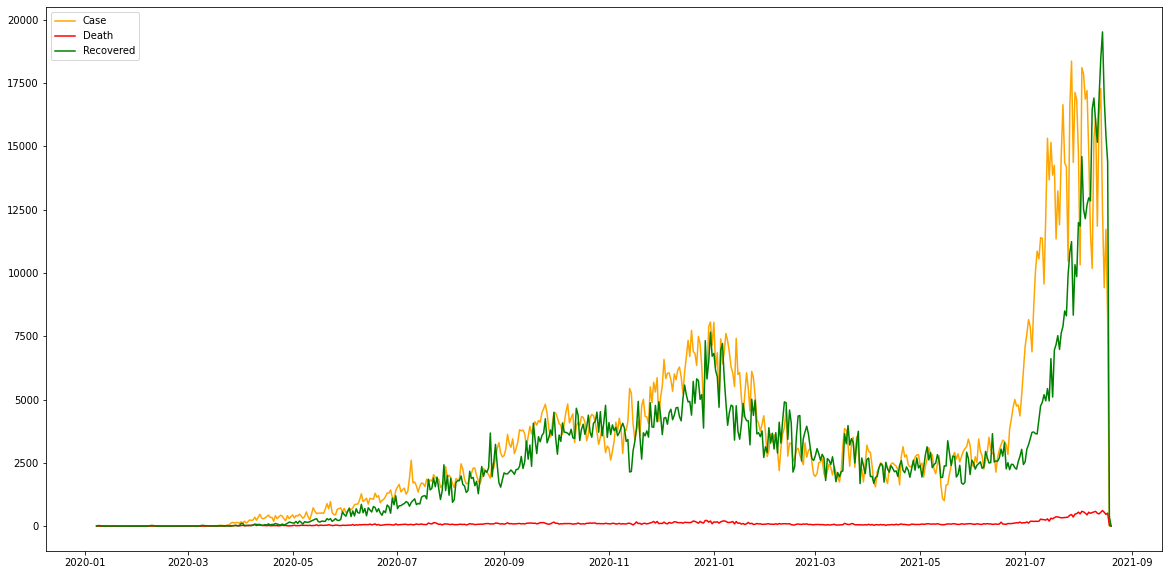

In [237]:
# time series perbandingan case, death, recovered

a = df_covid.groupby(df_covid['Date'])['Daily_Case'].sum()
b = df_covid.groupby(df_covid['Date'])['Daily_Death'].sum()
c = df_covid.groupby(df_covid['Date'])['Daily_Recovered'].sum()

plt.figure(figsize=(20,10))
plt.plot(a,color='orange')
plt.plot(b,color='red')
plt.plot(c,color='green')

plt.legend(["Case", "Death", "Recovered"])
plt.show()

In [238]:
#y = df_covid['Daily_Case']
#x = df_covid['Province'].sort_values()
#plt.figure(figsize=(60,10))
#plt.bar(x, y, label="Blue Bar", color='b')
#plt.plot()
#plt.show()

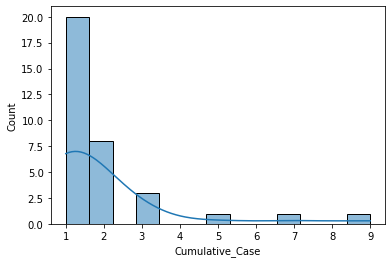

In [239]:
sns.histplot(cum_case.groupby('Province').min()['Cumulative_Case'].sort_values(), kde=True )

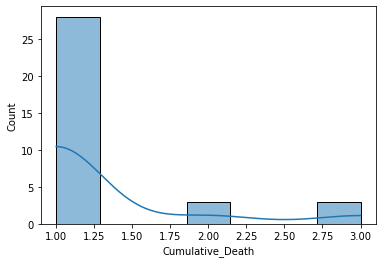

In [240]:
sns.histplot(cum_death.groupby('Province').min()['Cumulative_Death'].sort_values(), kde=True )

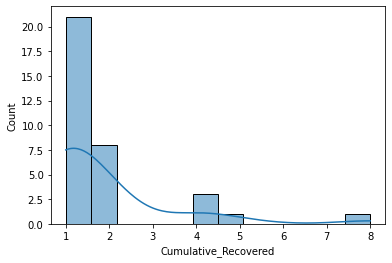

In [241]:
sns.histplot(cum_reco.groupby('Province').min()['Cumulative_Recovered'].sort_values(), kde=True)